<a href="https://colab.research.google.com/github/LMAPcoder/Distributed-Data-Analytics-Lab/blob/main/DDA_sheet11_1_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Distributed Data Analytics**

Leonardo Antiqui

N° 312940

Group 1

## Tutorial 11.1

In [ ]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

1 Manual Gradient Descent with the Iris Dataset

In [ ]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, train_dl):

    global θ

    loss_curve = list()

    # Repeat for given number of epochs
    for epoch in range(num_epochs):

        # Train with batches of data
        for xb, yb in train_dl:

            # 1. Generate predictions
            Y_hat = model(xb)

            # 2. Calculate loss
            loss = loss_fn(Y_hat, yb)

            # 3. Compute gradients
            loss.backward() #calculus of gradient ∇L(𝛉)

            with torch.no_grad(): #torch.no_grad indicates to PyTorch that we shouldn't track, calculate, or modify gradients while updating the weights and biases.
                θ -= θ.grad * lr
                θ.grad.zero_() #to prevent accomulation of gradients from previous ephocs

        loss_curve.append(loss.detach())

        #Computing accuracy on train and test datasets
        train_acc = accuracy(model, train_dl)
        # test_acc = accuracy(model, test_dl)

        if epoch%5 == 0:
            print(f'Epoch: {epoch}, training_loss: {loss.detach():.2f}, training_accuracy: {train_acc:.2f}')

    return loss_curve


def accuracy(model, data_loader):

    correct_pred = 0
    n = 0

    with torch.no_grad():

        for X, y in data_loader:

            y_logits = model(X)
            _, y_hat = torch.max(y_logits, 1) #valid for multiclass problem

            n += y.size(0)
            correct_pred += (y_hat == y).sum().item()

    return correct_pred / n

In [ ]:
iris_data = datasets.load_iris()
iris_data

Linear regression

\begin{align}
\hat Y = X \theta
\end{align}

Epoch: 0, training_loss: 1.02, training_accuracy: 0.40
Epoch: 5, training_loss: 0.90, training_accuracy: 0.67
Epoch: 10, training_loss: 0.76, training_accuracy: 0.69


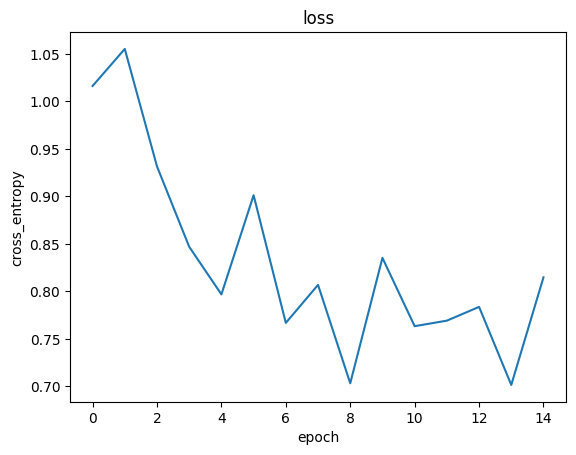

In [ ]:
X = iris_data.data
Y = iris_data.target

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y)

bias = torch.ones(X.shape[0], 1) #bias coefficient

X = torch.cat((X, bias), dim=1) # adding bias to X

train_ds = torch.utils.data.TensorDataset(X, Y)

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=15, shuffle=True)

θ = torch.zeros(X.shape[1], 3, requires_grad=True) # parameter initialization

model = lambda X: torch.matmul(X,θ) #linear regression model

loss = torch.nn.CrossEntropyLoss()
# loss = torch.nn.MSELoss()

num_epochs = 15
lr = 0.01 #learning rate

loss_curve = fit(num_epochs, model, loss, train_dl)

plt.plot(loss_curve)
plt.xlabel('epoch')
plt.ylabel('cross_entropy')
plt.title('loss')
plt.show()

2 Simple NN on Boston Housing

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

* MedInc median income in block group

* HouseAge median house age in block group

* AveRooms average number of rooms per household

* AveBedrms average number of bedrooms per household

* Population block group population

* AveOccup average number of household members

* Latitude block group latitude

* Longitude block group longitude

* MedHouseVal: house value for households within a block
(measured in US Dollars)

In [ ]:
#-From Google Drive
!wget --no-check-certificate -q 'https://docs.google.com/uc?export=download&id=12XO9hSMRNeJO9OjAxg59EG5q_nJbWGP-' -O california_housing.csv

In [ ]:
df = pd.read_csv('california_housing.csv',index_col=0)
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Standarization

In [ ]:
mean = df.mean()
std = df.std()

df = (df - mean) / std

df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,-1.216099,-0.289180,-0.155020,0.077352,-0.512579,-0.049109,1.801603,-0.758808,-1.115777
20636,-0.691576,-0.845373,0.276874,0.462353,-0.944382,0.005021,1.806285,-0.818702,-1.124443
20637,-1.142566,-0.924829,-0.090316,0.049413,-0.369528,-0.071733,1.778194,-0.823693,-0.992722
20638,-1.054557,-0.845373,-0.040210,0.158774,-0.604415,-0.091223,1.778194,-0.873605,-1.058583
20639,-0.780111,-1.004285,-0.070441,0.138399,-0.033976,-0.043681,1.750104,-0.833676,-1.017853


Predictors and target

In [ ]:
Y = df['MedHouseVal']
X = df.drop(columns=['MedHouseVal'])

Neural network

In [ ]:
import torch
import time
import copy

In [ ]:
torch.manual_seed(0)

In [ ]:
X = torch.tensor(X.values, dtype=torch.float32)
Y = torch.tensor(Y.values, dtype=torch.float32).view(-1, 1)

data = torch.utils.data.TensorDataset(X, Y)

train_ds, test_ds = torch.utils.data.random_split(data, [0.8, 0.2])
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=100, shuffle=False)

In [ ]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl, test_dl, device='cpu'):

    model.train() #setup model for training. Some types of layers, like batch normalization or dropout, behave differently
    loss_curve = list()
    start_time = time.time() #starting time of the training algorithm

    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        start_time_epoch = time.time() #starting time of the epoch

        L = 0
        i = 0
        # Train with batches of data
        for xb, yb in train_dl:

            xb = xb.to(device)
            yb = yb.to(device)

            # 1. Generate predictions
            Y_hat = model(xb)

            # 2. Calculate loss
            loss = loss_fn(Y_hat, yb)

            # 3. Compute gradients
            loss.backward()

            # 4. Update parameters using gradients
            opt.step()

            # 5. Reset the gradients to zero
            opt.zero_grad()

            #Save loss function values
            i += 1
            L += (1/i)*(loss.detach().item()-L)

        loss_curve.append(L)

        #Computing accuracy on train and test datasets
        train_mse = mse(model, train_dl, device)
        test_mse = mse(model, test_dl, device)

        end_time_epoch = time.time() #end time of the epoch
        elapsed_time = end_time_epoch - start_time_epoch

        if epoch%5 == 0:
            print(f'Epoch: {epoch}, time_epoch: {elapsed_time:.2f}, train_loss: {L:.2f}, train_mse: {train_mse:.2f}, test_mse: {test_mse:.2f}')

    return loss_curve

def mse(model, data_loader, device='cpu'):

    model.eval() #setup model for evaluation

    L = 0
    i = 0

    with torch.no_grad():

        for X, y in data_loader:

            X = X.to(device)
            y = y.to(device)

            y_hat = model(X)

            loss = torch.nn.functional.mse_loss(y_hat,y).item()

            i += 1
            L += (1/i)*(loss-L)

    return loss

Activation function: ReLU

In [ ]:
model_relu = torch.nn.Sequential(

    torch.nn.Linear(in_features=8, out_features=16),
    torch.nn.ReLU(inplace=True),
    torch.nn.Linear(in_features=16, out_features=32),
    torch.nn.ReLU(inplace=True),
    # torch.nn.BatchNorm1d(32),
    torch.nn.Linear(in_features=32, out_features=1)
  )

state_dict_relu = model_relu.state_dict() #to save the original state of the model
state_dict_original_relu = copy.deepcopy(state_dict_relu)

loss = torch.nn.MSELoss()

In [ ]:
from torchsummary import summary
summary(model_relu,X.size())

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 20640, 16]             144
              ReLU-2            [-1, 20640, 16]               0
            Linear-3            [-1, 20640, 32]             544
              ReLU-4            [-1, 20640, 32]               0
            Linear-5             [-1, 20640, 1]              33
Total params: 721
Trainable params: 721
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.63
Forward/backward pass size (MB): 15.27
Params size (MB): 0.00
Estimated Total Size (MB): 15.91
----------------------------------------------------------------


Learning rate optimization through grid search

In [ ]:
%%time
num_epochs = 20 #maximum number of ephocs
lrs = [0.01,0.05,0.1,0.15,0.2,0.25] #learning rate
loss_curves = list()
for lr in lrs:
  #Reset the parameters of the new model
  model_relu.load_state_dict(state_dict_original_relu)

  opt = torch.optim.SGD(
      model_relu.parameters(),
      lr=lr, #learning rate
      )
  print('learning rate:',lr)
  loss_curve = fit(num_epochs, model_relu, loss, opt, train_loader, test_loader)
  loss_curves.append(loss_curve)

learning rate: 0.01
Epoch: 0, time_epoch: 0.69, train_loss: 0.89, train_mse: 1.03, test_mse: 0.79
Epoch: 5, time_epoch: 0.43, train_loss: 0.39, train_mse: 0.34, test_mse: 0.37
Epoch: 10, time_epoch: 0.44, train_loss: 0.38, train_mse: 0.16, test_mse: 0.29
Epoch: 15, time_epoch: 0.42, train_loss: 0.32, train_mse: 0.42, test_mse: 0.25
learning rate: 0.05
Epoch: 0, time_epoch: 0.43, train_loss: 0.57, train_mse: 0.19, test_mse: 0.37
Epoch: 5, time_epoch: 0.63, train_loss: 0.31, train_mse: 0.18, test_mse: 0.25
Epoch: 10, time_epoch: 0.42, train_loss: 0.27, train_mse: 0.33, test_mse: 0.18
Epoch: 15, time_epoch: 0.43, train_loss: 0.26, train_mse: 0.09, test_mse: 0.37
learning rate: 0.1
Epoch: 0, time_epoch: 0.43, train_loss: 0.50, train_mse: 0.44, test_mse: 0.37
Epoch: 5, time_epoch: 0.42, train_loss: 0.29, train_mse: 0.91, test_mse: 0.20
Epoch: 10, time_epoch: 0.42, train_loss: 0.27, train_mse: 0.53, test_mse: 0.31
Epoch: 15, time_epoch: 0.64, train_loss: 0.25, train_mse: 0.49, test_mse: 0.27

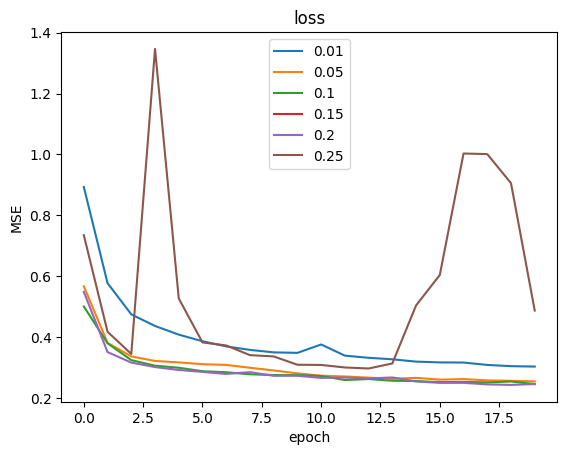

In [ ]:
for _, loss_curve in enumerate(loss_curves):
  plt.plot(loss_curve,label=lrs[_])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('loss')
plt.legend()
plt.show()

Activation function: TanH

In [ ]:
model_tanh = torch.nn.Sequential(

    torch.nn.Linear(in_features=8, out_features=16),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=16, out_features=32),
    torch.nn.Tanh(),
    # torch.nn.BatchNorm1d(32),
    torch.nn.Linear(in_features=32, out_features=1)
  )

state_dict_tanh = model_tanh.state_dict() #to save the original state of the model
state_dict_original_tanh = copy.deepcopy(state_dict_tanh)

loss = torch.nn.MSELoss()

Learning rate optimization through grid search

In [ ]:
%%time
num_epochs = 20 #maximum number of ephocs
lrs = [0.01,0.05,0.1,0.15,0.2,0.25] #learning rate
loss_curves = list()
for lr in lrs:
  #Reset the parameters of the new model
  model_tanh.load_state_dict(state_dict_original_tanh)

  opt = torch.optim.SGD(
      model_tanh.parameters(),
      lr=lr, #learning rate
      )
  print('learning rate:',lr)
  loss_curve = fit(num_epochs, model_tanh, loss, opt, train_loader, test_loader)
  loss_curves.append(loss_curve)

learning rate: 0.01
Epoch: 0, time_epoch: 0.91, train_loss: 0.68, train_mse: 0.35, test_mse: 0.52
Epoch: 5, time_epoch: 0.44, train_loss: 0.36, train_mse: 0.26, test_mse: 0.31
Epoch: 10, time_epoch: 0.44, train_loss: 0.33, train_mse: 1.36, test_mse: 0.25
Epoch: 15, time_epoch: 0.44, train_loss: 0.32, train_mse: 0.44, test_mse: 0.23
learning rate: 0.05
Epoch: 0, time_epoch: 0.66, train_loss: 0.46, train_mse: 0.34, test_mse: 0.37
Epoch: 5, time_epoch: 0.44, train_loss: 0.31, train_mse: 0.65, test_mse: 0.22
Epoch: 10, time_epoch: 0.43, train_loss: 0.29, train_mse: 0.66, test_mse: 0.32
Epoch: 15, time_epoch: 0.43, train_loss: 0.28, train_mse: 0.24, test_mse: 0.16
learning rate: 0.1
Epoch: 0, time_epoch: 0.44, train_loss: 0.42, train_mse: 0.31, test_mse: 0.33
Epoch: 5, time_epoch: 0.71, train_loss: 0.30, train_mse: 0.18, test_mse: 0.42
Epoch: 10, time_epoch: 0.42, train_loss: 0.28, train_mse: 0.14, test_mse: 0.25
Epoch: 15, time_epoch: 0.43, train_loss: 0.26, train_mse: 0.63, test_mse: 0.28

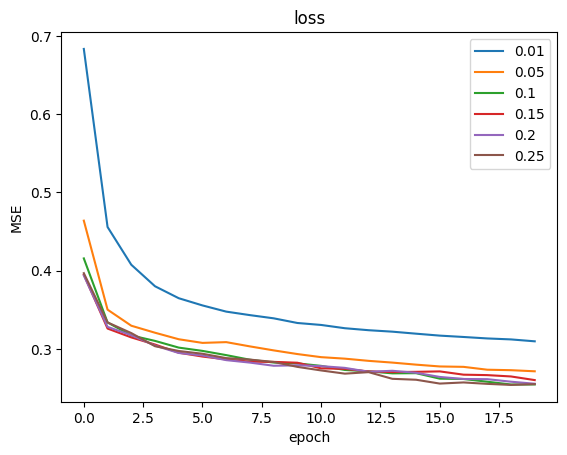

In [ ]:
for _, loss_curve in enumerate(loss_curves):
  plt.plot(loss_curve,label=lrs[_])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('loss')
plt.legend()
plt.show()

Conclusion: The NN with ReLU activations converges at its lowest test mse for a learning rate of 0.2, while for the NN with TanH activations this happens for learning rate of 0.05. It seems that the NN with ReLU activations converges faster.